In [15]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris



In [16]:

# Load the Iris dataset
iris = load_iris()
# Extract the first two features (columns) from the dataset
X = iris.data[:, :2]
# Extract the target variable from the dataset
y = iris.target


In [17]:

# Use the elbow method to find the optimum number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


C:\Users\Santy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


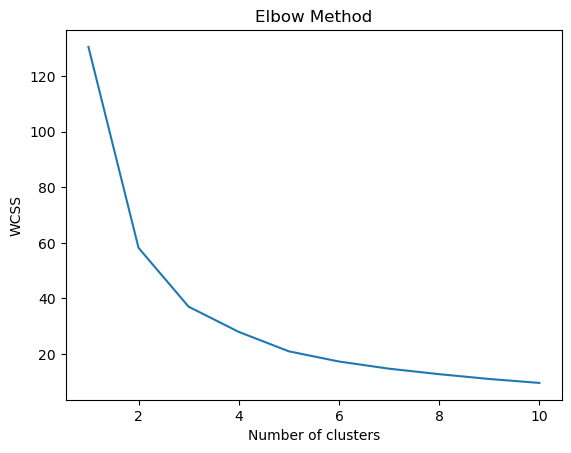

In [10]:

# Plot the elbow curve to visualize the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


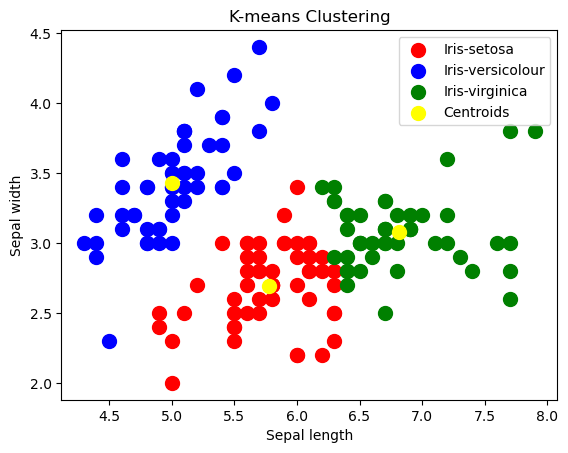

In [22]:

# Apply k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

# Visualize the clusters on the first two columns of the Iris dataset
plt.scatter(X[pred_y == 0, 0], X[pred_y == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[pred_y == 1, 0], X[pred_y == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[pred_y == 2, 0], X[pred_y == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.title('K-means Clustering')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()